[[235.08453164 115.44466081  60.83206749 ...  43.4621974   21.61110571
   14.63308481]
 [223.7778018   91.57458826 231.64072547 ... 251.44510864 233.81412497
  184.54479854]
 [233.52732313 114.83942562  29.21183864 ... 108.80797567  40.54513251
  130.86956986]
 ...
 [ 99.02878604 153.41676299  58.06981831 ...  13.31326801 141.04471774
  170.41537175]
 [202.85817273 112.04299904  37.31705275 ... 204.52157267 199.39248783
   26.32411245]
 [223.20155373 171.65808484 230.85787979 ... 221.09488172 253.49545584
   32.17070992]]


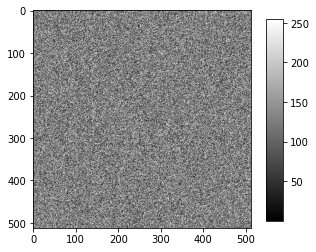

254.99980015295188


In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from PIL import Image

size = 512
shape = (size, size)
low = -0.5
high = 0.5
x = np.random.uniform(low, high, shape)

x_scaled = 255*(x + 0.5) # scaline, and now distributed uniformly between 0 and 1
print(x_scaled)
plt.imshow(x_scaled, cmap=plt.cm.gray)

cax = plt.axes([0.8, 0.15, 0.04, 0.7]) 

plt.colorbar(cax=cax)
plt.show()

print(np.max(x_scaled))

# convert to uint8, write to file (search for proper syntax)
img_out1 = Image.fromarray(x_scaled.astype(np.uint8))
img_out1.save('xfuzz.tif')

In [ ]:
# create empty y array
shape = (size,size)
val = 0
dt = np.double
y = np.empty(shape,dtype=dt)
y.fill(val)

for m in range(size):
    for n in range(size):
        y[m][n] = 3*x[m][n]
        if (m-1 >= 0):
            y[m][n] += 0.99*y[m-1][n]
        if (n-1 >= 0):
            y[m][n] += 0.99*y[m][n-1]
        if (m-1 >= 0 and n-1 >= 0):
            y[m][n] += -0.9801*y[m-1][n-1]

# for m in range(size):
#     for n in range(size):
#         y[m][0] = 0
#         y[0][n] = 0

In [ ]:
# shape = (size,size)
# val = 127
# dt = np.double
# new = np.empty(shape,dtype=dt)
# new.fill(val)

y = y + 127

for m in range(size):
    for n in range(size):
        if y[m][n] > 255:
            y[m][n] = 255
        if y[m][n] < 0:
            y[m][n] = 0

plt.imshow(y, cmap=plt.cm.gray)

cax = plt.axes([0.8, 0.15, 0.04, 0.7])

plt.colorbar(cax=cax)
plt.show()

print(np.max(y))

# convert to uint8, write to file (search for proper syntax)
img_out2 = Image.fromarray(y.astype(np.uint8))
img_out2.save('y.tif')